# `titanic.ipynb`

# Tinatic 생존 예측

## KNN 분류

## Logistic 회귀 분류

## 결정트리 분류

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
# 결측치 확인

titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values before filling - age: 177
Missing values after filling - age: 0


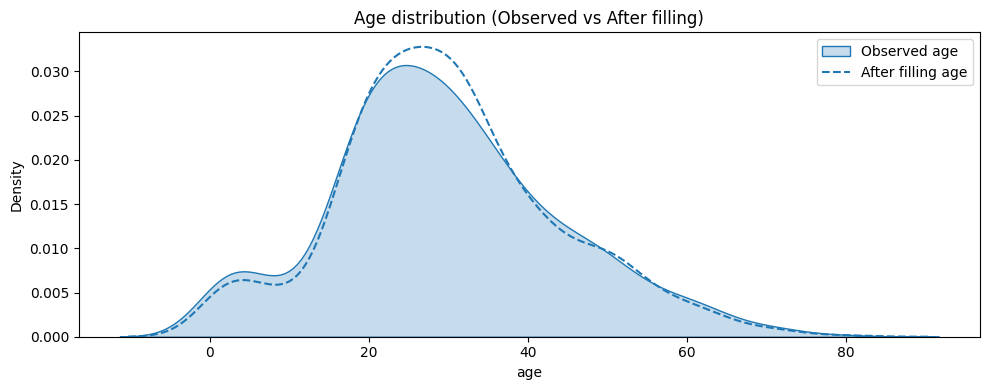

In [29]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1) Load dataset
titanic = sns.load_dataset('titanic')
df = titanic.copy()

print("Missing values before filling - age:", df['age'].isna().sum())

# 2) Features for KNN
features = ['pclass', 'fare', 'sex']

# 3) Split data
df_known = df.dropna(subset=['age']).copy()
df_missing = df[df['age'].isna()].copy()

X_train = df_known[features]
y_train = df_known['age']
X_pred = df_missing[features]

# 4) Preprocessing
num_feats = ['pclass', 'fare']
cat_feats = ['sex']

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats),
    ]
)

# 5) KNN model
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')

# 6) Pipeline
model = Pipeline([
    ('preprocess', preprocess),
    ('knn', knn_reg)
])
model.fit(X_train, y_train)

# 7) Predict missing ages
age_pred = model.predict(X_pred)
df.loc[df['age'].isna(), 'age'] = age_pred

print("Missing values after filling - age:", df['age'].isna().sum())

# 8) Visualization
plt.figure(figsize=(10,4))
sns.kdeplot(df_known['age'], label='Observed age', fill=True)
sns.kdeplot(df['age'], label='After filling age', linestyle='--')
plt.title('Age distribution (Observed vs After filling)')
plt.legend()
plt.tight_layout()
plt.show()


Missing values before filling - age: 177
Missing values after filling - age: 0


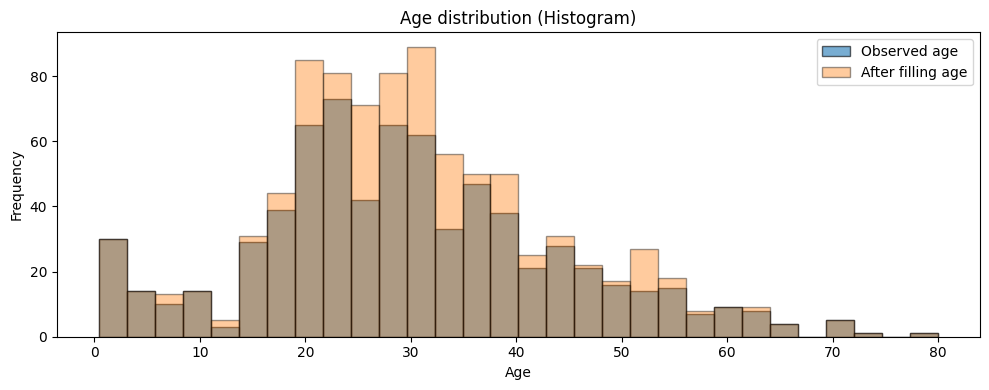

In [32]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1) Load dataset
titanic = sns.load_dataset('titanic')
df = titanic.copy()

print("Missing values before filling - age:", df['age'].isna().sum())

# 2) Features for KNN
features = ['pclass', 'fare', 'sex']

# 3) Split data
df_known = df.dropna(subset=['age']).copy()
df_missing = df[df['age'].isna()].copy()

X_train = df_known[features]
y_train = df_known['age']
X_pred = df_missing[features]

# 4) Preprocessing
num_feats = ['pclass', 'fare']
cat_feats = ['sex']

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats),
    ]
)

# 5) KNN model
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')

# 6) Pipeline
model = Pipeline([
    ('preprocess', preprocess),
    ('knn', knn_reg)
])
model.fit(X_train, y_train)

# 7) Predict missing ages
age_pred = model.predict(X_pred)
df.loc[df['age'].isna(), 'age'] = age_pred

print("Missing values after filling - age:", df['age'].isna().sum())

# 8) Histogram visualization
plt.figure(figsize=(10,4))
plt.hist(df_known['age'], bins=30, alpha=0.6, label='Observed age', edgecolor='black')
plt.hist(df['age'], bins=30, alpha=0.4, label='After filling age', edgecolor='black')
plt.title('Age distribution (Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


Accuracy: 0.832

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.78      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



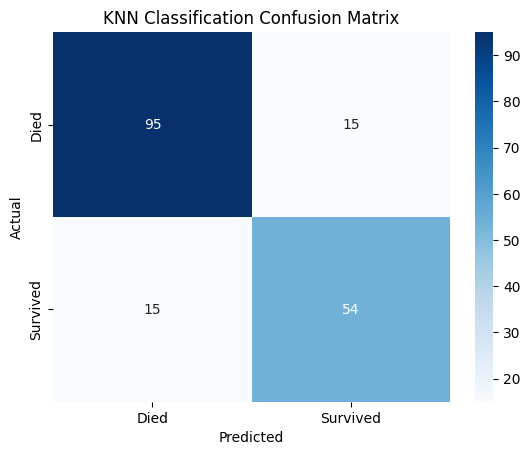

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 이미 df에 age 결측치 채운 상태라고 가정
# (앞에서 df = titanic.copy() 후 age를 KNN으로 채웠음)

# 1) Feature & Target
features = ['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone']
X = df[features]
y = df['survived']

# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Preprocessing
num_feats = ['pclass', 'age', 'fare']
cat_feats = ['sex', 'adult_male', 'alone']

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(drop='if_binary'), cat_feats)
    ]
)

# 4) KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

pipe = Pipeline([
    ('preprocess', preprocess),
    ('knn', knn_clf)
])

# 5) Train
pipe.fit(X_train, y_train)

# 6) Predict
y_pred = pipe.predict(X_test)

# 7) Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died','Survived'],
            yticklabels=['Died','Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Classification Confusion Matrix")
plt.show()


Accuracy: 0.788

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



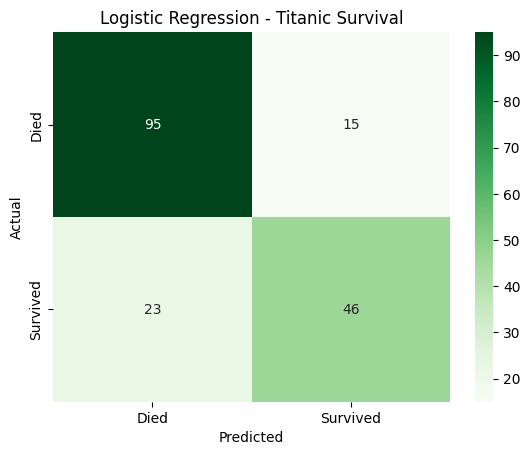

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Feature & Target
features = ['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone']
X = df[features]
y = df['survived']

# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Preprocessing
num_feats = ['pclass', 'age', 'fare']
cat_feats = ['sex', 'adult_male', 'alone']

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(drop='if_binary'), cat_feats)
    ]
)

# 4) Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

pipe = Pipeline([
    ('preprocess', preprocess),
    ('logreg', log_reg)
])

# 5) Train
pipe.fit(X_train, y_train)

# 6) Predict
y_pred = pipe.predict(X_test)

# 7) Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Died','Survived'],
            yticklabels=['Died','Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Titanic Survival")
plt.show()


Accuracy: 0.821

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



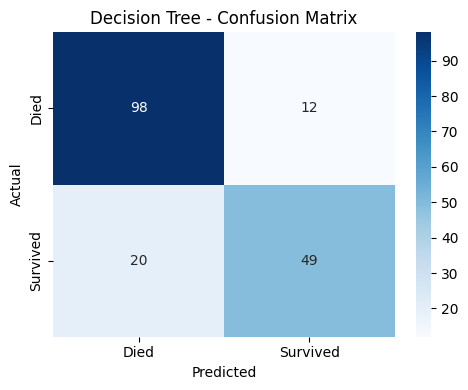


Top 10 Feature Importances:
cat__adult_male_True    0.4590
num__fare               0.2304
num__pclass             0.1506
num__age                0.1400
cat__alone_True         0.0102
cat__sex_male           0.0099
dtype: float64


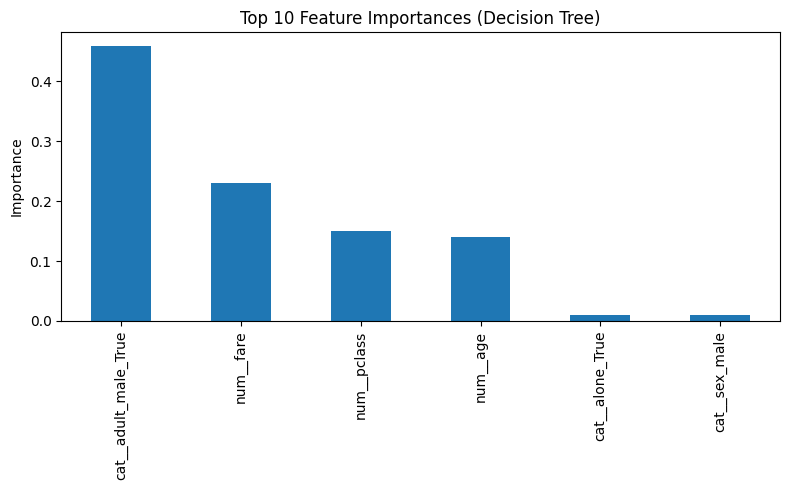

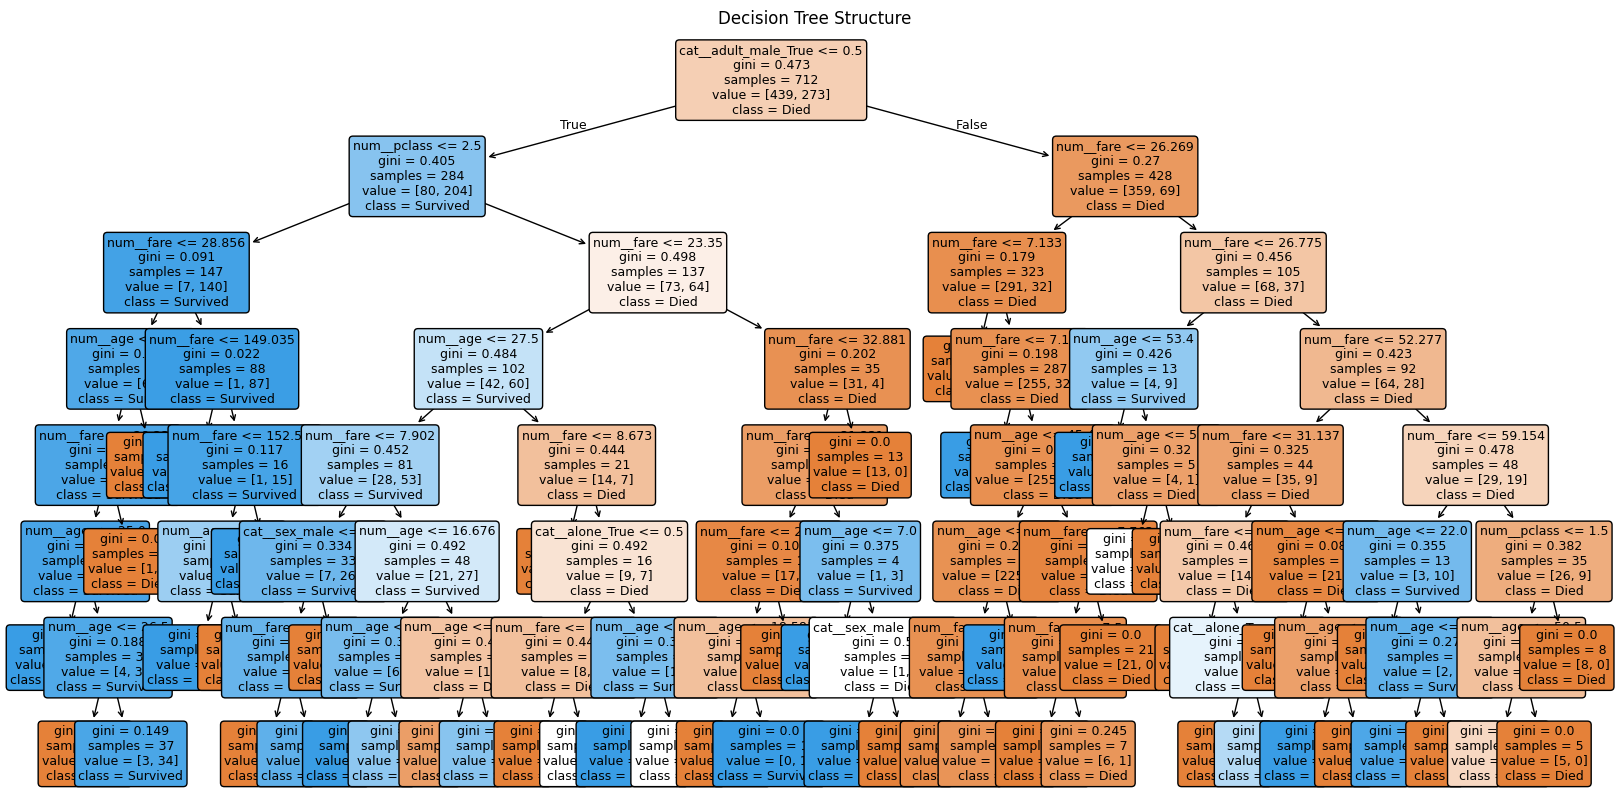

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ===================== 1) Feature & Target =====================
features = ['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone']
X = df[features]            # df: age already imputed by your previous step
y = df['survived']

# ===================== 2) Train/Test split =====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===================== 3) Preprocessing =====================
num_feats = ['pclass', 'age', 'fare']
cat_feats = ['sex', 'adult_male', 'alone']

# Trees don't need scaling. Keep numeric as-is (passthrough).
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_feats),
        ('cat', OneHotEncoder(drop='if_binary'), cat_feats)
    ],
    remainder='drop'
)

# ===================== 4) Model =====================
dt = DecisionTreeClassifier(
    max_depth=7,      # you can try 3, 5, 7, ... to control complexity
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

pipe = Pipeline([
    ('preprocess', preprocess),
    ('clf', dt)
])

# ===================== 5) Train =====================
pipe.fit(X_train, y_train)

# ===================== 6) Predict & Evaluate =====================
y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died','Survived'],
            yticklabels=['Died','Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# ===================== 7) Feature Importances =====================
# Get transformed feature names
ohe = pipe.named_steps['preprocess']
feature_names = ohe.get_feature_names_out()

importances = pipe.named_steps['clf'].feature_importances_
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\nTop 10 Feature Importances:")
print(fi.head(10).round(4))

plt.figure(figsize=(8,5))
fi.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# ===================== 8) Plot the Tree (optional) =====================
# WARNING: plotting large/unrestricted trees can be hard to read.
# Consider setting max_depth (e.g., 3 or 4) above before training.
plt.figure(figsize=(20, 10))
plot_tree(
    pipe.named_steps['clf'],
    feature_names=feature_names,
    class_names=['Died','Survived'],
    filled=True,
    rounded=True,
    impurity=True,
    fontsize=9
)
plt.title("Decision Tree Structure")
plt.show()
